In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


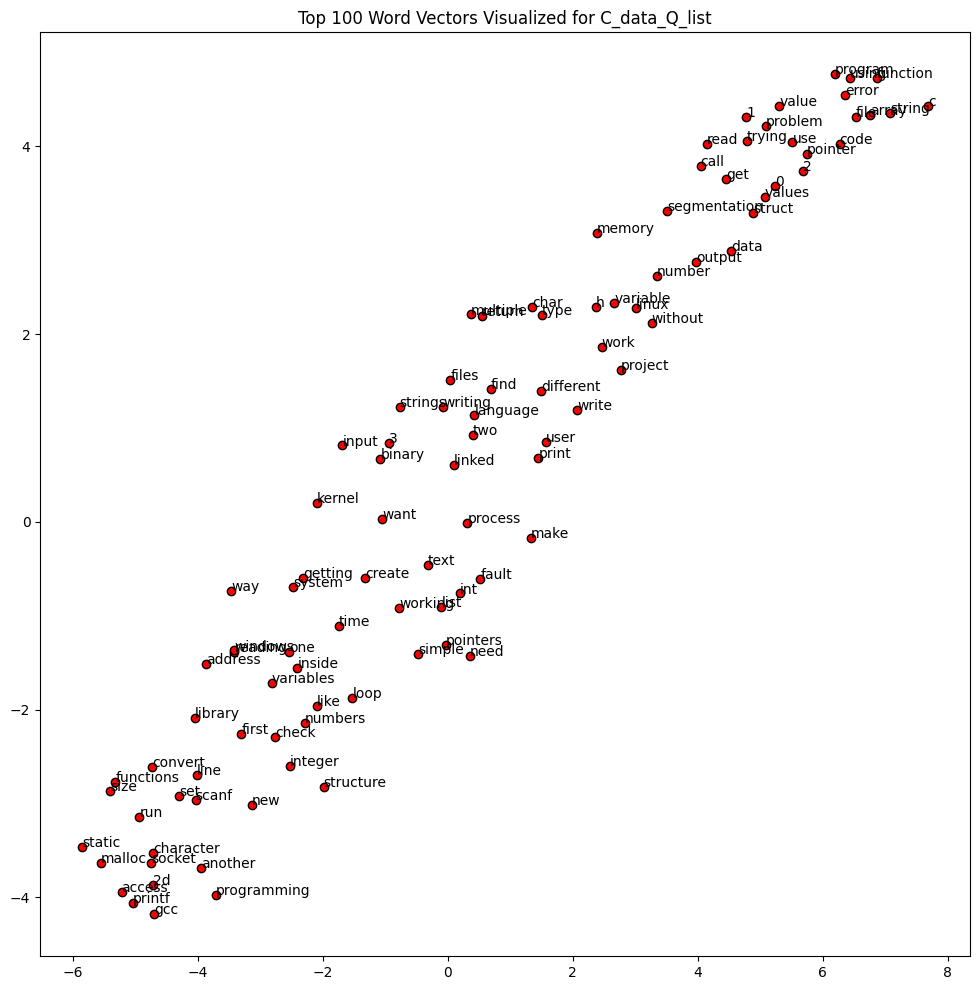

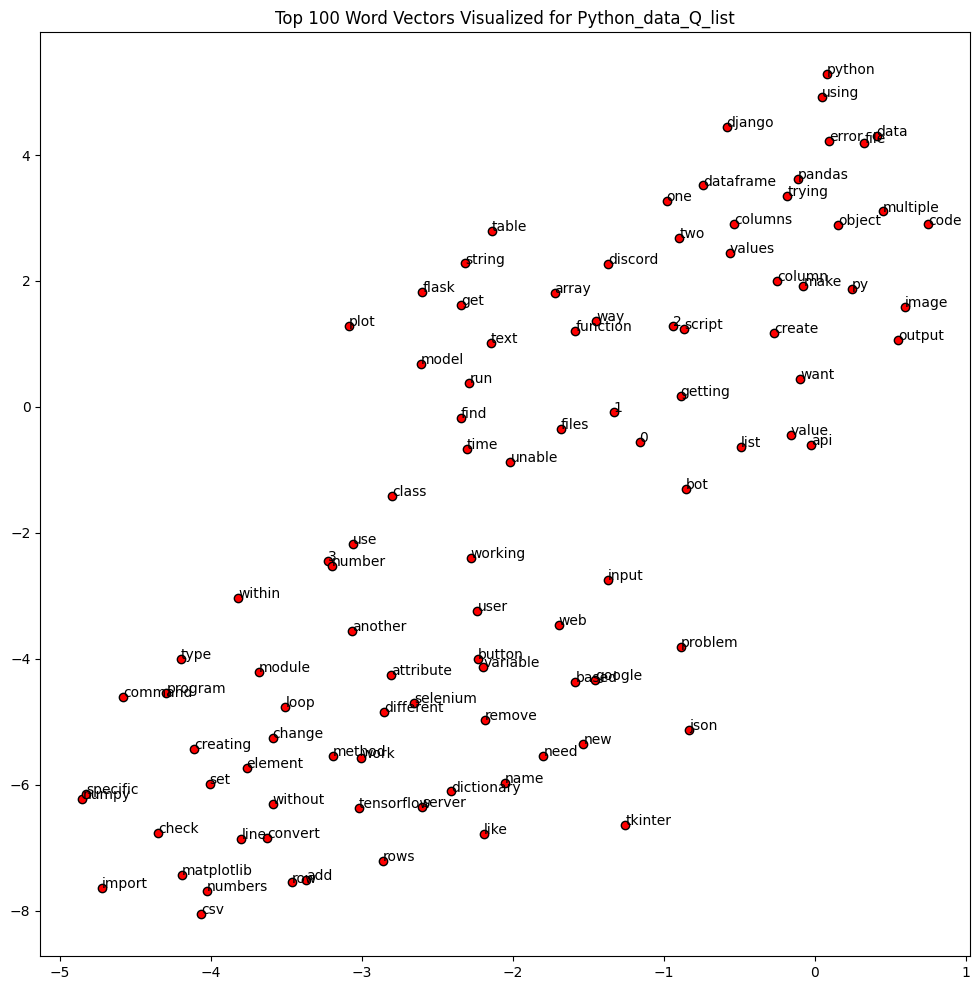

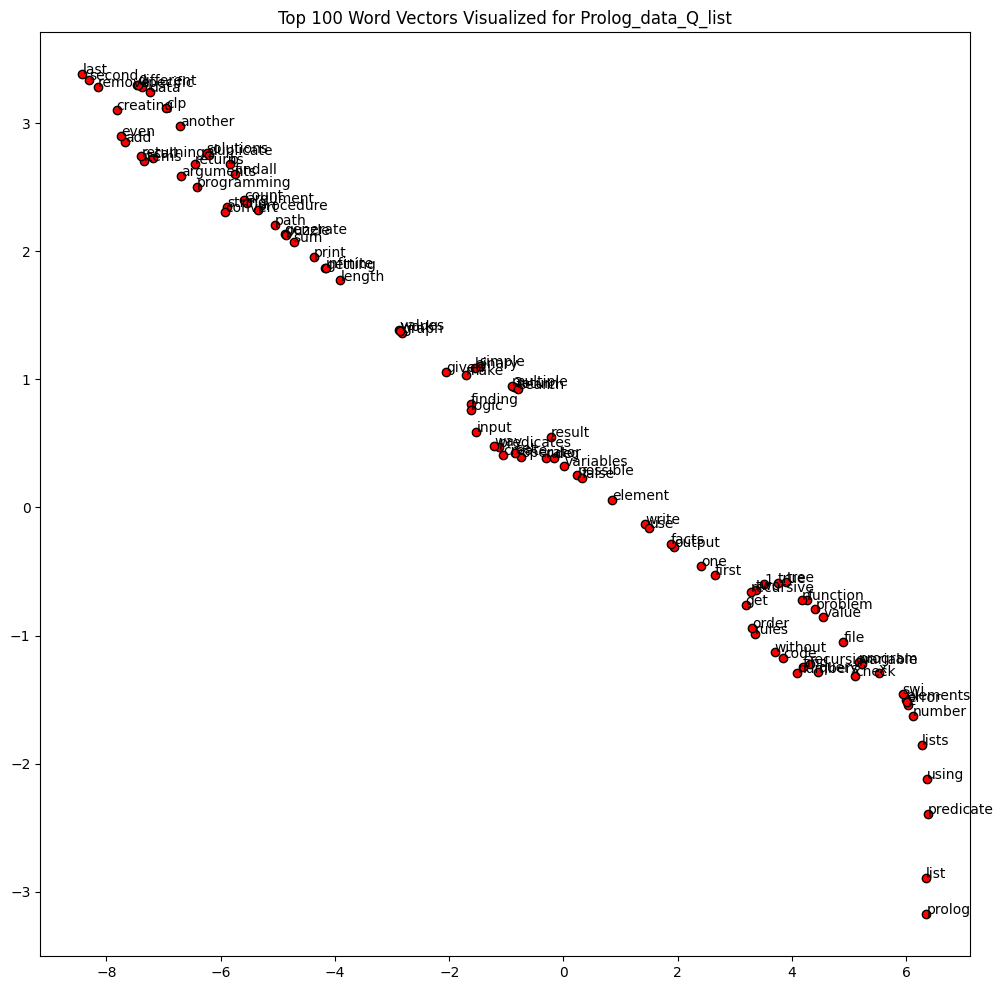

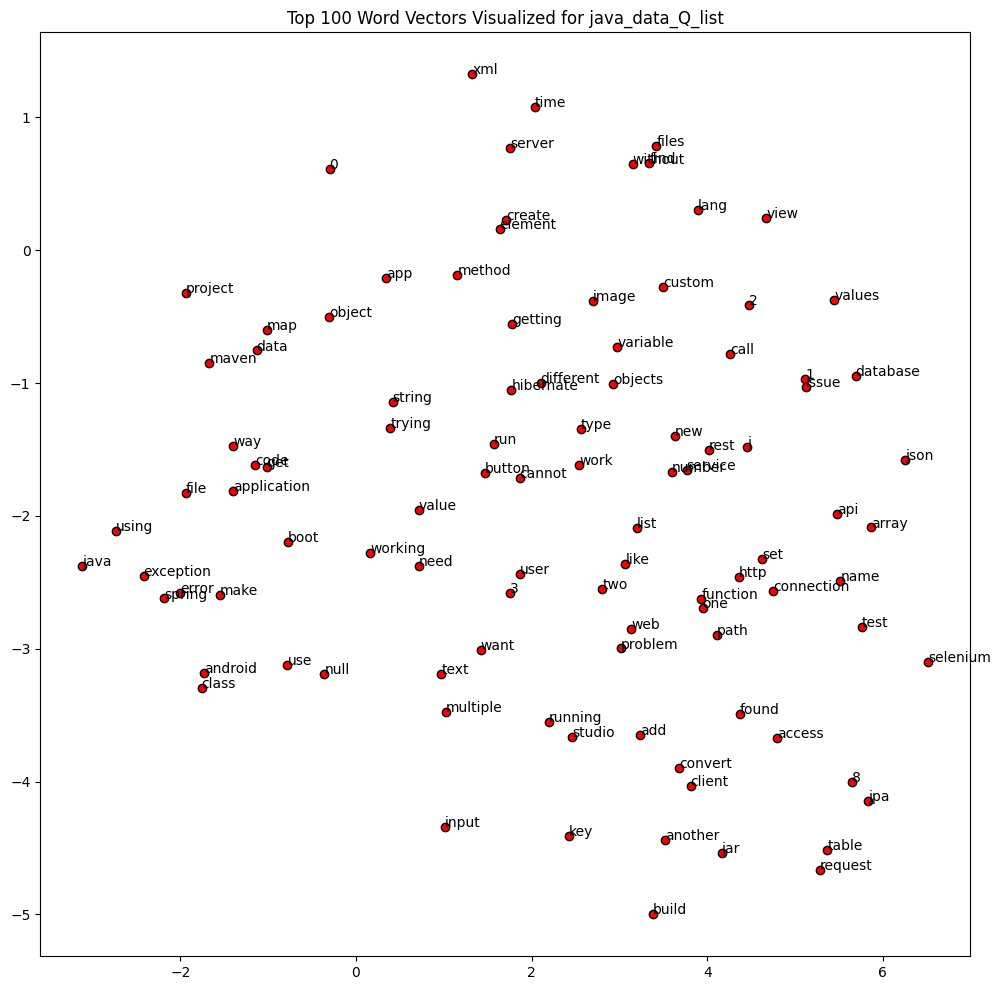

In [ ]:
import os
import re
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# 경로 설정 (실제 데이터가 있는 경로로 설정하세요)
directory_path = '/content/drive/MyDrive/four programming/four programming_Q_list'

# 불용어 설정
stop_words = set(stopwords.words('english'))

# 전처리 함수
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text.lower())
    text = re.sub(r'\s+', ' ', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words

# 각 언어별 텍스트 데이터 로드 및 전처리
languages_texts = {}
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        language = filename.split(".txt")[0]
        with open(os.path.join(directory_path, filename), 'r', encoding='utf-8') as file:
            text = file.read()
            languages_texts[language] = preprocess_text(text)

# 각 언어별 Word2Vec 모델 학습 및 t-SNE 시각화
for language, texts in languages_texts.items():
    # Word2Vec 모델 학습
    model = Word2Vec([texts], vector_size=100, window=5, min_count=1, workers=4)

    # 상위 100개 단어 추출
    top_words = model.wv.index_to_key[:100]  # Change here to select top 100 words
    top_word_vectors = np.array([model.wv[word] for word in top_words])

    # t-SNE를 사용한 차원 축소
    tsne = TSNE(n_components=2, random_state=0)
    top_word_vectors_2d = tsne.fit_transform(top_word_vectors)

    # 그래프 그리기
    plt.figure(figsize=(12, 12))
    plt.scatter(top_word_vectors_2d[:, 0], top_word_vectors_2d[:, 1], edgecolors='k', c='r')
    for i, word in enumerate(top_words):
        plt.text(top_word_vectors_2d[i, 0], top_word_vectors_2d[i, 1], word)
    plt.title(f"Top 100 Word Vectors Visualized for {language}")
    plt.show()